In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
import os

In [4]:
# read train  28x28 pixels
train = pd.read_csv('D:\\Downloads\\MNISTtrain\\train.csv')  #D:\Downloads\MNISTtrain\train.csv
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# read test 
test= pd.read_csv("D:\\Downloads\\MNISTtest\\test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# put labels into y_train variable
#label - label of the numbers
Y_train = train["label"] #output - label
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) #except label - all other 784 pixels(28x28)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

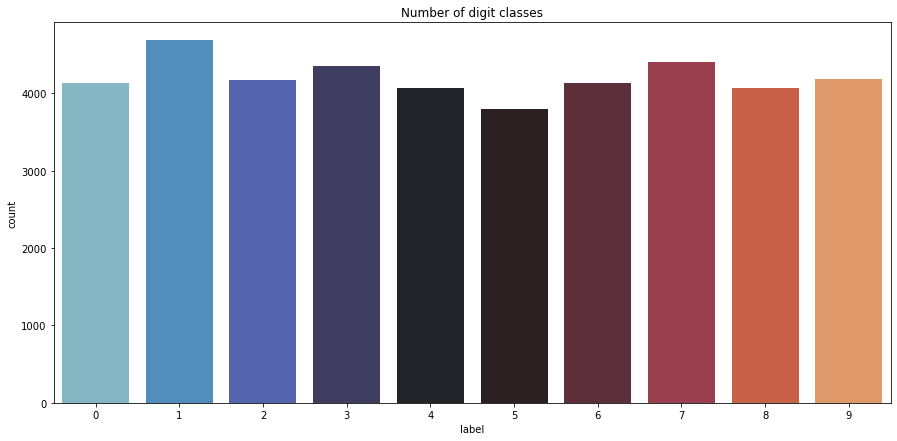

In [7]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="icefire") #seaborn
plt.title("Number of digit classes")
Y_train.value_counts()

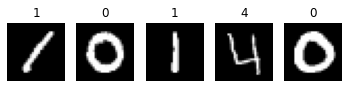

In [8]:
# plotting samples
#img=X_train.iloc[0].as_matrix() as_matrix-converts to numpy representation - deperecated
for i in range(5):
    img = X_train.iloc[i].to_numpy()
    #iloc - position, to_numpy - converts the frame to numpy array representation
    img = img.reshape((28,28)) # converting vector to 28x28
    sp=plt.subplot(1,5,i+1)
    plt.imshow(img,cmap='gray') 
    plt.title(train.iloc[i,0]) #label 
    plt.axis("off")
    sp.axis("off")
plt.show()

In [9]:
# Normalization - reduces the effect of illumination differences
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [10]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [11]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

In [12]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
#using 10% of train data for validation
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


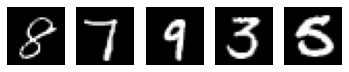

In [13]:
# Some examples
for i in range(5):
    sp=plt.subplot(1,5,i+1)
    plt.imshow(X_train[i][:,:,0],cmap='gray')
    plt.axis("off")
    sp.axis("off")
plt.show()

In [14]:
#convolutional neural network
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
# conv -> maxpool -> dropout ->conv->maxpool->dropout->fullyconnected(flatten,dense,dropout,dense)
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1))) #5x5 filter
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) #drop 25% of neurons
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected 
model.add(Flatten()) #converting to a vector
model.add(Dense(256, activation = "relu")) #relu
model.add(Dropout(0.5)) #dropout-regularization approach, prevents overfitting
model.add(Dense(10, activation = "softmax")) #softmax - multinomial distribution

In [15]:
#define the optimizer
#adam optimizer - stochastic gradient descent
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [16]:
#compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [17]:
epochs = 15
batch_size = 250

In [18]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [19]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/15
151/151 [==============================] - 14s 87ms/step - loss: 1.1451 - accuracy: 0.6181 - val_loss: 0.2300 - val_accuracy: 0.9390
Epoch 2/15
151/151 [==============================] - 12s 79ms/step - loss: 0.4412 - accuracy: 0.8606 - val_loss: 0.1350 - val_accuracy: 0.9593
Epoch 3/15
151/151 [==============================] - 11s 74ms/step - loss: 0.3266 - accuracy: 0.8968 - val_loss: 0.1088 - val_accuracy: 0.9664
Epoch 4/15
151/151 [==============================] - 14s 90ms/step - loss: 0.2709 - accuracy: 0.9145 - val_loss: 0.0903 - val_accuracy: 0.9714
Epoch 5/15
151/151 [==============================] - 12s 81ms/step - loss: 0.2371 - accuracy: 0.9263 - val_loss: 0.0786 - val_accuracy: 0.9764
Epoch 6/15
151/151 [==============================] - 13s 84ms/step - loss: 0.2204 - accuracy: 0.9319 - val_loss: 0.0717 - val_accuracy: 0.9760
Epoch 7/15
151/151 [==============================] - 12s 80ms/step - loss: 0.2007 - accuracy: 0.9368 - val_loss: 0.0615 - val_accuracy:

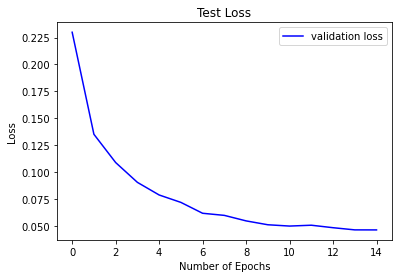

In [20]:
#evaluate the model
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 1s 5ms/step


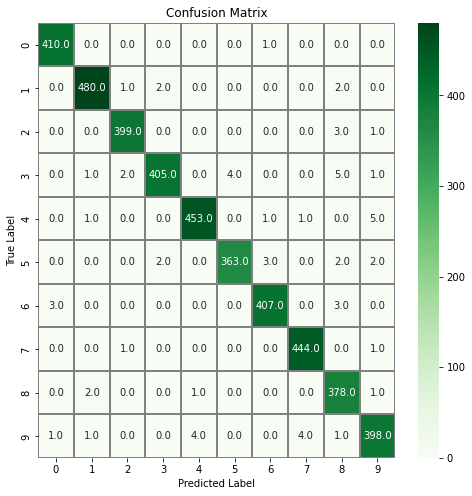

In [21]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [22]:
#Accuracy
import sklearn.metrics
acc=sklearn.metrics.accuracy_score(Y_true,Y_pred_classes)
print(acc)

0.985


1/1 [==============================] - 0s 20ms/step


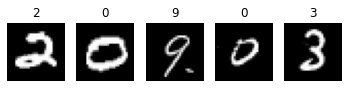

In [23]:
#predictions
ts=test[0:5]
ts_pred=model.predict(ts)
ts_pred_classes=np.argmax(ts_pred,axis=1)
ts_pred_classes
for i in range(5):
    sp=plt.subplot(1,5,i+1)
    plt.imshow(test[i][:,:,0],cmap='gray')
    plt.title(ts_pred_classes[i])
    plt.axis("off")
    sp.axis("off")
plt.show()

In [24]:
#DeepSHAP is implemented here
#reference image is taken from the training sample 
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(test[0:5])


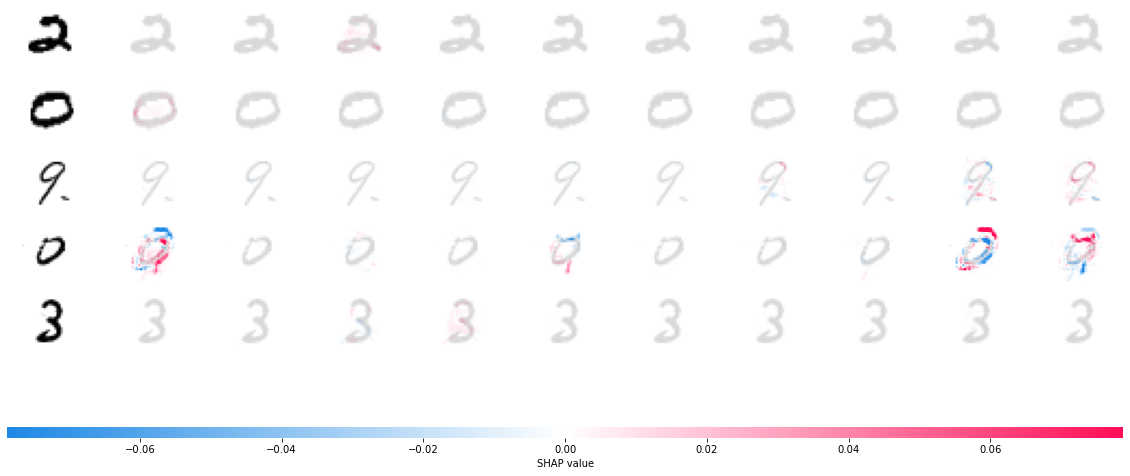

In [26]:
# plot the feature attributions
shap.image_plot(shap_values, -test[0:5])
#0th row, 2nd column is brighter compared to others in 0th row wich means the prediction is 2 and shap is resoning the pixels responsible for 2
#1st row 0th column is brighter which means prediction is 0 and its reasoning is given

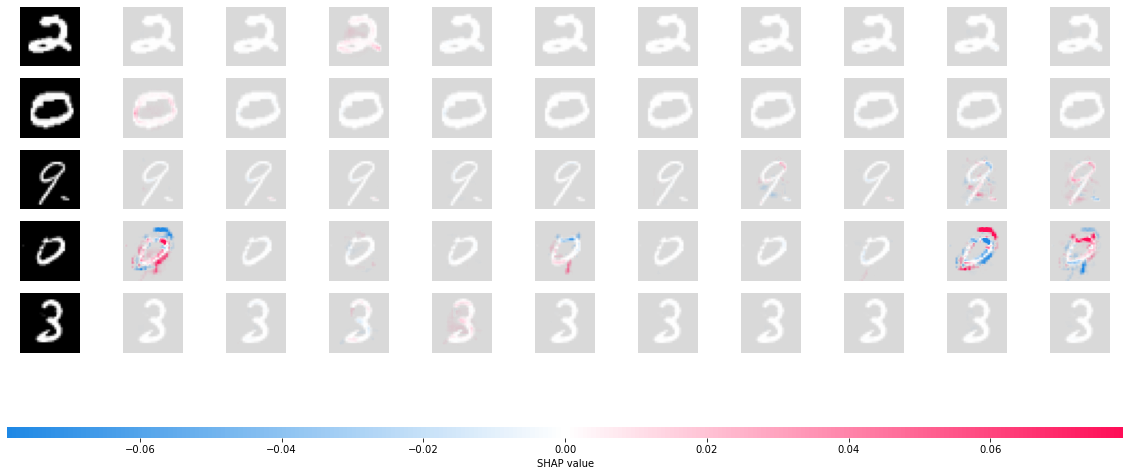

In [29]:
# plot the feature attributions 
#same plot with boxes
shap.image_plot(shap_values, test[0:5])
#explanations are ordered for the classes 0-9 going left to right along the rows

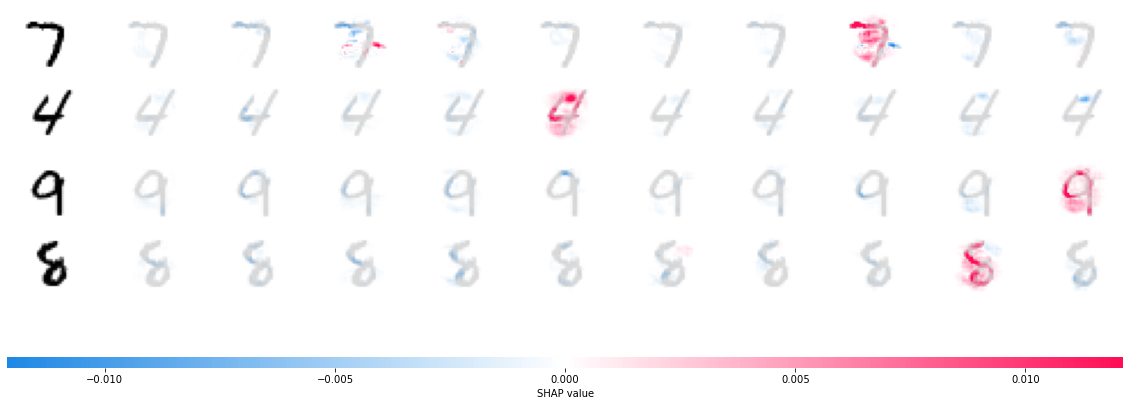

In [30]:
'''This is an enhanced version of the DeepLIFT algorithm (Deep SHAP) where, similar to Kernel SHAP, we approximate the 
conditional expectations of SHAP values using a selection of background samples. Lundberg and Lee, NIPS 2017 showed that 
the per node attribution rules in DeepLIFT (Shrikumar, Greenside, and Kundaje, arXiv 2017) can be chosen to approximate 
Shapley values. By integrating over many backgound samples DeepExplainer estimates approximate SHAP values such that they
sum up to the difference between the expected model output on the passed background samples and the current model output
(f(x) - E[f(x)]).'''
#some more examples
shap_values=e.shap_values(test[41:45])
shap.image_plot(shap_values,-test[41:45])

In [31]:
'''Interpretation of results
In the above output, consider the 0th row.[0,0] --> colors denote the reason why it is / it is not 0
[0,1] --> why it is/it is not 1 (Red - why it is?, Blue - why it is not?)
[0,7] --> why it is / it is not 7'''

'''for [0,7] --> the pixels making straight line on the top are contributing towards classifying it as 7
for [1,4] --> the pixels making left vertical line and right vertical line with gap on the top between them are contributing 
if there is no line it might become 9 
[1,9] --> the blue pixels are the reason why it is not 9'''

'Interpretation of results\nIn the above output, consider the 0th row.[0,0] --> colors denote the reason why it is / it is not 0\n[0,1] --> why it is/it is not 1 (Red - why it is?, Blue - why it is not?)\n[0,7] --> why it is / it is not 7'